<a href="https://colab.research.google.com/github/mananuppadhyay/IPARC-Decision-trees/blob/main/Method_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the IPARC github repository

In [ ]:
!git clone https://github.com/ac20/IPARC_ChallengeV2

Cloning into 'IPARC_ChallengeV2'...
remote: Enumerating objects: 2393, done.
remote: Counting objects: 100% (2393/2393), done.
remote: Compressing objects: 100% (1039/1039), done.
remote: Total 2393 (delta 1491), reused 2248 (delta 1352), pack-reused 0
Receiving objects: 100% (2393/2393), 1.76 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (1491/1491), done.


In [ ]:
%cd /content/IPARC_ChallengeV2

/content/IPARC_ChallengeV2


Print one random input output pair, by giving the directory name




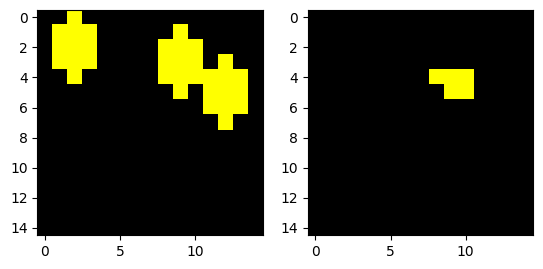

In [ ]:
import json
import numpy as np
from skimage.color import label2rgb

with open('./Dataset/CatA_Simple/Task001.json', 'r') as f:
    data = json.load(f)

# Extract input and output arrays from the first example
input_array = np.array(data[0]['input'])
output_array = np.array(data[0]['output'])

# Create a palette to map the label values to colors
palette = np.array([[255, 255, 0], [255, 255, 255], [0, 0, 0]], dtype=np.uint8)

# Convert label values to RGB colors using the palette
input_rgb = label2rgb(input_array, bg_label=0, bg_color=[0, 0, 0], colors=palette)
output_rgb = label2rgb(output_array, bg_label=0, bg_color=[0, 0, 0], colors=palette)

# Show the images
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
axs[0].imshow(input_rgb)
axs[1].imshow(output_rgb)
plt.show()


Print all input output pairs (might take some time to print all)

In [ ]:
import json
import numpy as np
from skimage.color import label2rgb
import os

def visualize_json_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r') as f:
                try:
                    data = json.load(f)
                except ValueError:
                    print(f"Error: {file_path} is not a valid JSON file.")
                    continue

            input_array = np.array(data[0]['input'])
            output_array = np.array(data[0]['output'])

            palette = np.array([[255, 255, 0], [255, 255, 255], [0, 0, 0]], dtype=np.uint8)

            # Convert label values to RGB colors using the palette
            input_rgb = label2rgb(input_array, bg_label=0, bg_color=[0, 0, 0], colors=palette)
            output_rgb = label2rgb(output_array, bg_label=0, bg_color=[0, 0, 0], colors=palette)

            # Show the images
            import matplotlib.pyplot as plt
            fig, axs = plt.subplots(1, 2)
            axs[0].imshow(input_rgb, vmin=0, vmax=255)
            axs[1].imshow(output_rgb, vmin=0, vmax=255)
            plt.show()
visualize_json_files("/content/IPARC_ChallengeV2/Dataset/CatA_Simple")


Create a dataframe with difference of input and output pixel values

In [ ]:
import os
import json
import pandas as pd

# Define the directory where the JSON files are located
json_dir = "/content/IPARC_ChallengeV2/Dataset/CatA_Simple"

# Get a list of all the JSON files in the directory and sort them by name
json_files = sorted([f for f in os.listdir(json_dir) if f.endswith(".json")])

# Initialize an empty list to store the feature vectors
feature_vectors = []

# Loop through all the JSON files in the directory
for filename in json_files:
    # Load the JSON file
    with open(os.path.join(json_dir, filename)) as f:
        data = json.load(f)

    # Convert the input and output pixel values to NumPy arrays
    input_pixels = np.array(data[0]['input'])
    output_pixels = np.array(data[0]['output'])

    # Compute the absolute difference between the output and input pixel values for each pixel
    diff_pixels = np.abs(output_pixels - input_pixels)

    # Flatten the resulting 2D array into a 1D array
    feature_vector = diff_pixels.flatten()

    # Append the feature vector to the list
    feature_vectors.append(feature_vector)

# Convert the list of feature vectors to a pandas dataframe
df = pd.DataFrame(feature_vectors)

# Print the dataframe
df.head()


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,1,1


Create another dataframe to show the presence of a particular morphological method

In [ ]:
import pandas as pd
import os

seq_names = ['Dilation SE1', 'Dilation SE2', 'Dilation SE3', 'Dilation SE4', 'Dilation SE5', 'Dilation SE6', 'Dilation SE7', 'Dilation SE8', 'Erosion SE1', 'Erosion SE2', 'Erosion SE3', 'Erosion SE4', 'Erosion SE5', 'Erosion SE6', 'Erosion SE7', 'Erosion SE8']

df2 = pd.DataFrame(columns=["FileIndex"] + seq_names)

for i in range(100):
    filename = f"Task{i:03}_soln.txt"
    filepath = os.path.join("/content/IPARC_ChallengeV2/Dataset/CatA_Simple", filename)
    with open(filepath, "r") as f:
        file_contents = f.read()
    row = [i] + [1 if seq_name in file_contents else 0 for seq_name in seq_names]
    df2.loc[i] = row

df2 = df2.sort_values("FileIndex").reset_index(drop=True)
df2 = df2.drop("FileIndex", axis=1)

df2.head()


,Dilation SE1,Dilation SE2,Dilation SE3,Dilation SE4,Dilation SE5,Dilation SE6,Dilation SE7,Dilation SE8,Erosion SE1,Erosion SE2,Erosion SE3,Erosion SE4,Erosion SE5,Erosion SE6,Erosion SE7,Erosion SE8
0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0
2,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0
3,1,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0
4,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0,1


The entire data at hand, including both feature and target variables

In [ ]:
df_f= pd.concat([df, df2], axis=1)
df_f.head()

,0,1,2,3,4,5,6,7,8,9,...,Dilation SE7,Dilation SE8,Erosion SE1,Erosion SE2,Erosion SE3,Erosion SE4,Erosion SE5,Erosion SE6,Erosion SE7,Erosion SE8
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,1,1,1
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
3,1,1,1,1,1,1,1,0,0,0,...,1,0,1,1,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,1


Creating a model, to predict the 8 possible operations

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
targets = df2
features = df
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
output = pd.DataFrame(y_pred, columns=seq_names)

In [ ]:
output.head()

,Dilation SE1,Dilation SE2,Dilation SE3,Dilation SE4,Dilation SE5,Dilation SE6,Dilation SE7,Dilation SE8,Erosion SE1,Erosion SE2,Erosion SE3,Erosion SE4,Erosion SE5,Erosion SE6,Erosion SE7,Erosion SE8
0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0
2,0,0,1,1,1,0,1,0,0,0,1,1,1,0,1,0
3,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
4,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0


In [ ]:
y_test.head()

,Dilation SE1,Dilation SE2,Dilation SE3,Dilation SE4,Dilation SE5,Dilation SE6,Dilation SE7,Dilation SE8,Erosion SE1,Erosion SE2,Erosion SE3,Erosion SE4,Erosion SE5,Erosion SE6,Erosion SE7,Erosion SE8
83,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
53,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1
70,1,0,1,1,1,0,0,0,1,0,1,1,1,0,0,0
45,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
44,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test.values, y_pred, average='weighted')


print(f"Precision: {precision}")

Precision: 0.3889579020013802


Very clearly this model is unable to predict the 8 posisble transformations to reach the output